<a href="https://colab.research.google.com/github/vasantbala/vb_ai_course/blob/main/neural_networks/prework/Hands_on_Pre_work_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Concepts Covered:**

- <a href = #link1>Matrix Operations (Linear Algebra)</a>
- <a href = #link2>Functions and Derivatives</a>
- <a href = #link3>Optimization: Gradient Descent</a>
- <a href = #link4>Introduction to TensorFlow and Keras</a>

# <a id='link1'>**Matrix Operations (Linear Algebra)**</a>

In [ ]:
import numpy as np     # import numpy library

### Now, let's create a matrix using functions: arange() and reshape()

In [ ]:
M = np.arange(12).reshape(4,3)
M

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

### Sometimes, we need to flip the axes/dimensions of a matrix. When we interchange a matrix’s rows and columns, the result is called the **transpose** of the matrix.

In [ ]:
M.T       # taking transpose of the matrix

array([[ 0,  3,  6,  9],
       [ 1,  4,  7, 10],
       [ 2,  5,  8, 11]])

### You can read more about the use of numpy for matrix operations and other mathematical operations in general using this link: [NumPy basics](https://numpy.org/doc/stable/user/basics.html)

### Decomposition of Matrix:

- Eigendecomposition: We can use a built-in function in numpy "numpy.linalg.eig" for computing the eigenvalues.

In [ ]:
import numpy as np

p, v = np.linalg.eig(np.array([[4, 2], [2, 5]]))
print(p)
print(v)

[2.43844719 6.56155281]
[[-0.78820544 -0.61541221]
 [ 0.61541221 -0.78820544]]


Note:

- NumPy normalizes the eigenvectors to unit length, whereas we took ours to be of arbitrary length.

### Norm:

- In code, we can calculate the L2 norm of a vector as follows.

In [ ]:
a = np.array([-3, 4])
np.linalg.norm(a)

5.0

- To calculate the L1 norm, we compose the absolute value function with a sum over the elements.

In [ ]:
np.abs(a).sum()

7

In [ ]:
b = np.ones((4,4))
b

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [ ]:
np.linalg.norm(b)

4.0

### Rank:

In [ ]:
mat1 = np.arange(1,7).reshape(2,3)
mat1

array([[1, 2, 3],
       [4, 5, 6]])

In [ ]:
np.linalg.matrix_rank(mat1)

2

In [ ]:
mat2 = np.ones((4,))
mat2

array([1., 1., 1., 1.])

In [ ]:
np.linalg.matrix_rank(mat2) # 1 dimension - rank 1 unless all 0

1

In [ ]:
mat3 = np.zeros((4,))
mat3

array([0., 0., 0., 0.])

In [ ]:
np.linalg.matrix_rank(mat3)

0

# <a id='link2'>**Functions and Derivatives**</a>

These are the most widely used function in Deep Learning:

- Linear: `y = w*x + b`
- Exponential: `y = e^x` or `y = np.exp(x)`
- Logarithm: `y = log(x)` or `y = np.log(x)`
- Power: `y = x**4` or `y = np.power(x, 4)`
- Modulus: `y = |x|` or `y = np.absolute(x)`
- Trigonometric: `y = cos(x)` or `y = np.cos(x)`

### Let's define a composite function and visualize that:

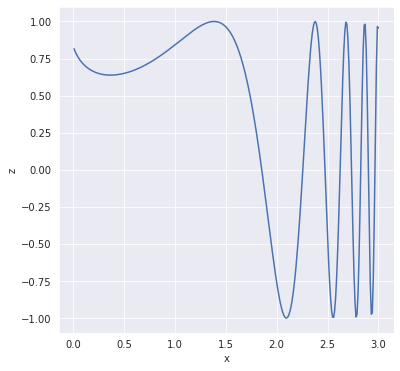

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def composite_function(x):
  sns.set({'figure.figsize': (6,6)})
  plt.xlabel('x')
  plt.ylabel('z')
  y = x**x
  z = np.sin(y)
  return plt.plot(x, z);

x = np.arange(0.01, 3.01, 0.01)
composite_function(x)

# <a id='link3'>**Optimization: Gradient Descent**</a>

- For simplicity we choose the objective function  `y = x`<sup>`2`</sup> to illustrate how to implement gradient descent.
- Although we know that  `x = 0`  is the solution to minimize y, we still use this simple function to observe how  `x`  changes.

In [ ]:
y = lambda x: x**2                  # Objective function
gradient_y = lambda x: 2 * x        # Its derivative

- Next, we use `x = 8` as the initial value and assume `η = 0.1`.
- Using gradient descent to iterate `x` for 10 times we can see that, eventually, the value of `x` approaches the optimal solution.

In [ ]:
def gradient(epoch, learning_rate):
    x = 10
    results = [x]
    for i in range(epoch):
        x = x - learning_rate * gradient_y(x)
        results.append(float(x))
        print('Epoch %d: %f' %(epoch+1, x))
    return results

### **Terminology:**

- **Learning Rate:** In machine learning, the learning rate is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function.

It metaphorically represents the speed at which a machine learning model "learns".

In this case, the learning rate determines the speed at which we reach the minima of the function.

So, here is the thing with higher values and lower values of learning rate:
- **Higher Learning Rate -** With a high learning rate we can cover more ground each step, but we risk overshooting the lowest point since the slope of the hill is constantly changing.
- **Low Learning Rate -** With a very low learning rate, we can confidently move in the direction of the negative gradient since we are recalculating it so frequently. A low learning rate is more precise, but calculating the gradient is time-consuming, so it will take us a very long time to get to the bottom.

In [ ]:
epoch1 = 5
learning_rate1 = 0.1
result1 = gradient(epoch1, learning_rate1)

Epoch 6: 8.000000
Epoch 6: 6.400000
Epoch 6: 5.120000
Epoch 6: 4.096000
Epoch 6: 3.276800


In [ ]:
# show_trajectory(result1, epoch1, learning_rate1)

In [ ]:
epoch2 = 5
learning_rate2 = 0.2
result2 = gradient(epoch2, learning_rate2)

Epoch 6: 6.000000
Epoch 6: 3.600000
Epoch 6: 2.160000
Epoch 6: 1.296000
Epoch 6: 0.777600


In [ ]:
# show_trajectory(result2, epoch2, learning_rate2)

In [ ]:
epoch3 = 20
learning_rate3 = 0.1
result3 = gradient(epoch3, learning_rate3)

Epoch 21: 8.000000
Epoch 21: 6.400000
Epoch 21: 5.120000
Epoch 21: 4.096000
Epoch 21: 3.276800
Epoch 21: 2.621440
Epoch 21: 2.097152
Epoch 21: 1.677722
Epoch 21: 1.342177
Epoch 21: 1.073742
Epoch 21: 0.858993
Epoch 21: 0.687195
Epoch 21: 0.549756
Epoch 21: 0.439805
Epoch 21: 0.351844
Epoch 21: 0.281475
Epoch 21: 0.225180
Epoch 21: 0.180144
Epoch 21: 0.144115
Epoch 21: 0.115292


In [ ]:
# show_trajectory(result3, epoch3, learning_rate3)

In [ ]:
def show_trajectory(result, epoch, learning_rate, ax=None, **kwargs):
    n = max(abs(min(result)), abs(max(result)))
    ax = ax
    domain = np.arange(-n, n, 0.01)
    sns.set({'figure.figsize': (8,8)})
    ax.plot(domain, [x**2 for x in domain], '--r', **kwargs)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title("For Epoch = {}, learning rate = {}".format(epoch, learning_rate)) 
    ax.plot(result, [x**2 for x in result], '-o', **kwargs)

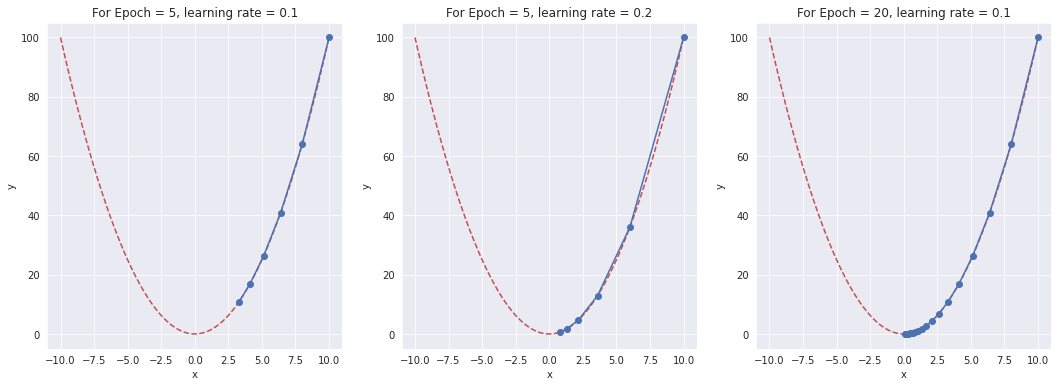

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,6))
show_trajectory(result1, epoch1, learning_rate1, ax1)
show_trajectory(result2, epoch2, learning_rate2, ax2)
show_trajectory(result3, epoch3, learning_rate3, ax3)

### Insights:

- Here you can see how we achieve the minimum value using different learning rates and epochs in gradient descent.
- First, we initialize the minimum value randomly as 10.
- As we iterate the gradient descent, we reach nearer to the minima.

# <a id='link4'>**Introduction to TensorFlow and Keras**</a>

### Linear Regression using TensorFlow (To become familiar with the TensorFlow framework by implementing some trivial tasks)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

print(tf.__version__)

2.3.0


In [ ]:
tf.random.set_seed(1)         

### Now, let's creat a dataset for further demonstration of techniques.

In [ ]:
x = np.array([50, 80, 100 , 30, 50, 20, 90, 10, 20, 150, 180, 45, 95, 90, 70, 120],  dtype=float)
y = np.array([150, 200, 240, 100, 140, 80, 220, 60, 100, 490, 450, 180, 250, 200, 300, 400],  dtype=float)

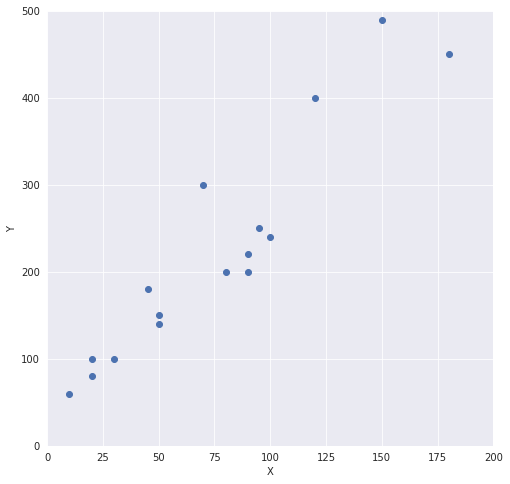

In [ ]:
plt.scatter(x, y)
plt.xlim(0,200)
plt.ylim(0,500)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=1, input_shape=[1])
])

### **Terminology:**

- **Sequential:** A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.

    If you want to know when to use a Sequential model, read [here](https://www.tensorflow.org/guide/keras/sequential_model#when_to_use_a_sequential_model)
- **Dense:** Just your regular densely-connected NN layer.

**Note: If you don't understand much about these terms used here, don't worry about it. By the time, you'll get familiar with these terms and their use.**

In [ ]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.01))

### **Terminology:**

- **Adam:** Adam is an alternative optimization algorithm that provides more efficient neural network weights by running repeated cycles of "adaptive moment estimation."
    - The number inside the paranthesis of the Adam is the learning rate.

In [ ]:
history = model.fit(X_train, y_train, epochs=1000, verbose=False, validation_split=0.1)
print("Finished training the model")

Finished training the model


### **Terminology:**

- **Epoch:** In terms of artificial neural networks, an epoch refers to one cycle through the full training dataset. Usually, training a neural network takes more than a few epochs. In other words, if we feed a neural network the training data for more than one epoch in different patterns, we hope for a better generalization when given a new "unseen" input (test data).

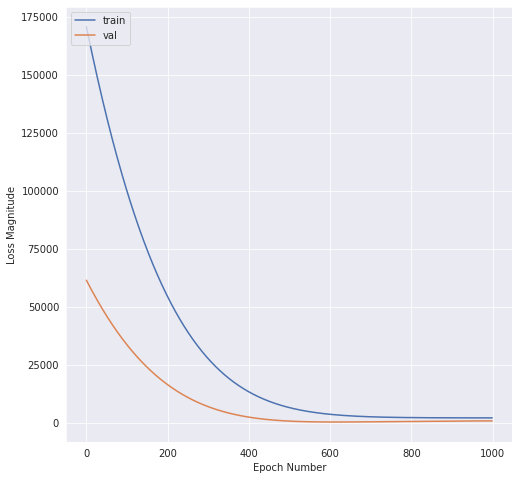

In [ ]:
sns.set({'figure.figsize': (8,8)})
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'val'], loc='upper left')

### Insights:

- The x-axis represents the epochs (number of iterations) and the y-axis represents the Loss magnitude.
- We see the loss is decreasing as the number of epochs increase.
- It means as we train more, the model becomes more closer to give good predictions. The error between the actual and predicted values reduces.

### Key Takeaways:

- After a certain number of epochs, the loss becomes constant and there is no change. It means that we reached saturation.
- As we reached saturation around 300 epochs, there is no need of going for further iterations, as this is the waste of time/resources. [Computation time plays a vital role while you build something at large scale]
- So, TensorFlow provides some functions which take care of the above problem. It stops the training if the loss reaches a certain value and it's not changing significantly in the next iterations. It stops automatically according to the threshold you set.

In [ ]:
y_pred = model.predict(X_test)
print('Actual Values', y_test)
print('Predicted Values', y_pred.reshape(1,-1))

Actual Values [150. 200.  80. 300. 200.]
Predicted Values [[144.88547  229.20914   60.561806 201.10124  257.31702 ]]
